# Module 17 - Numerical Quadrature and Magnetic Fields

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width=500px>

## Goals

- Solving for the magnetic field
- Solving integral equations

## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## The Biot-Savart Law

The integral form of one of Maxwell's equations allows us to solve for the magnetic field $\vec{B}$ for situations with constant current:

\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0 I}{4\pi} \int_C \frac{\vec{d\ell} \times \vec{r'}}{r'^3}
\end{equation}

where $C$ is a curve parameterizing the wire carying current and $\vec{r'}$ is the distance between the current element $\vec{d\ell}$ and the point of measurement $\vec{r}$.

In general, we can only solve this integral analytically for highly symmetric systems. Therefore, we must resort to numerical quadrature integration to find the magnetic field for realistic systems.

## Newton-Cotes Quadrature

Consider the general definite integral:

\begin{equation}
I = \int_a^b f(x) dx
\end{equation}

and consider breaking up the region of integration into $N$ equally sized regions of size:

\begin{equation}
\Delta x = \frac{b-a}{N}
\end{equation}

where $N \in \mathbb{Z} \gg 1$.  The first step is to break up the integral into $N$ pieces:

\begin{align}
I &= \int_a^b f(x) dx \newline
&= \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx + \cdots + \int_{x_{N-1}}^{x_N} f(x) dx \newline
&= \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} f(x) dx
\end{align}

where we have defined $x_i = a + i\Delta x$.  Different numerical integration algorthims correspond to different approximations for the *top* of the panels.

### Rectangular Rule

We replace the function with a constant value:

\begin{equation}
I_R = \int_{a}^{b} f(x) dx \approx \sum_{i=0}^{N-1} f(x_i) \Delta x .
\end{equation}

### Trapezoidal Rule
We can do better using a Taylor expansion at lowest order which provides a linear approximation to the function. 

\begin{align}
I_i &= \int_{x_i}^{x_{i+1}} f(x) dx \approx \Delta x \left[f(x_i) + \frac{1}{2}\left(f(x_{i+1})-f(x_i)\right) \right] \newline
&\approx  \frac{\Delta x}{2} \left[f(x_{i+1}) + f(x_i) \right]
\end{align}

Summing over all panels:

\begin{equation}
I_T   \approx \frac{\Delta x}{2} \left[f(a) + f(b) \right] +  \sum_{i=1}^{N-1} f(x_i) \Delta x .
\end{equation}

### How do we determine the error in these expressions?

Consider the [Euler-Maclaurin series](https://en.wikipedia.org/wiki/Euler%E2%80%93Maclaurin_formula) for the discrete function $f(i)$:

\begin{equation}
\sum_{i=0}^{N-1} f(i) = \int_0^N f(u) du - \frac{1}{2} \left[f(0) + f(N) \right] + \sum_{k=1}^\infty \frac{B_{2k}}{(2k\!)} \left[f^{(2k-1)}(N) - f^{(2k-1)}(0) \right] (\Delta x)^{2k-1}
\end{equation}

where $B_{2k}$ are the [Bernoulii numbers](https://en.wikipedia.org/wiki/Bernoulli_number) and $f^{(k)} = d^k f(u)/du^k$.

If we make the variable transformation: $x = u \Delta x + a$ then $u =0 \Rightarrow x=a$ and $u=N \Rightarrow x=b$.  Also on the LHS, when $u=i$ we have the discrete position $x_i$.  We can write:

\begin{equation}
\sum_{i=0}^{N-1} f(x_i) = \frac{1}{\Delta x} \int_{a}^{b} f(x) dx - \frac{1}{2}\left[ f(a) + f(b)\right] +  \sum_{k=1}^\infty \frac{B_{2k}}{(2k\!)} \left[f^{(2k-1)}(b) - f^{(2k-1)}(a) \right] (\Delta x)^{2k-1}
\end{equation}

and multiplying by $\Delta x$ and rearranging such that our integral $I$ is on the LHS we find:

\begin{equation}
\int_{a}^{b} f(x) dx = \sum_{i=0}^{N-1} \Delta x f(x_i) + \frac{\Delta x}{2}\left[ f(a) + f(b)\right]  -  \frac{(\Delta x)^2}{12} \left[f'(b) - f'(a) \right] + \mathrm{O}\left(\Delta x^4\right) .
\end{equation}

Therefore we see that the errors are:

\begin{eqnarray}
\text{Rectangular:} \quad & \quad \mathrm{O}{\left(\Delta x\right)} \newline
\text{Trapezoidal:} \quad & \quad \mathrm{O}{\left(\Delta x^2\right)}
\end{eqnarray}

where we note that things can go seriously wrong when we have a divergent derivative at the endpoints. 

<div class="span alert alert-success">
<h2>  Programming challenge </h2>
<br><br>
Create a function `mytrapz(y, x)` that takes as input two arrays, $y$ and $x$, with values of a function $y = f(x)$ sampled between two values $a$ and $b$, and returns $\int_a^b ydx$. Test `mytrapz` by integrating the function $x^2$ from 1 to 2. Compare your result to that obtained from `scipy.integrate.trapz`.
</div>

In [17]:
from scipy.integrate import trapz

def mytrapz(y, x):
    a = x[0]
    b = x[-1]
    dx = x[1] - x[0]
    return (y[0] + y[-1])*dx/2.0 + y[1:-1].sum()*dx

def f(x):
    return x*x

x = np.linspace(1,2,50)

print(mytrapz(f(x),x))
print(trapz(f(x),x))

2.33340274885
2.33340274885


## Example:  Magnetic field due to a straight wire with a constant current

We can use the Biot-Savart law to calculate the magnetic field at some position $\vec{r}$ for a simple system consisting of a straight wire with a constant current $I$.

<img src="./Biot-Savart_mag_field.png" width=500px>

our straight wire is decribed by the curve $\vec{\ell(t)} = \{0, 0, t-L\}$ for $t=0\ldots2L$. The infinitesimal current loop in this case becomes $\vec{d\ell(t)} = \frac{\vec{d\ell(t)}}{dt}dt = \{0, 0, dt\} = \hat{k}dt$ and the integral for the magnetic field is now

\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0 I}{4\pi} \int_0^{2L} dt \frac{\hat{k} \times \vec{r'(t)}}{r'(t)^3},
\end{equation}

where $\hat{k} \times \vec{r'(t)} = -r_y\hat{i} + r_x\hat{j} + 0\hat{k}$ and $\vec{r'(t)} = \vec{r} - \vec{\ell(t)} = r_x\hat{i} + r_y\hat{j} + (r_z - t + L)\hat{k}$. We can separate this into two separate integrals for each component of the magnetic field:

\begin{align}
B_x(\vec{r}) &= \frac{\mu_0 I}{4\pi} \int_0^{2L} dt \frac{-r_y}{r'(t)^3} = \int dB_x \\
B_y(\vec{r}) &= \frac{\mu_0 I}{4\pi} \int_0^{2L} dt \frac{r_x}{r'(t)^3} = \int dB_y \\
B_z(\vec{r}) &= 0
\end{align}

<div class="span alert alert-success">
<h2>  Programming challenge(s) </h2>
<br><br>
1) Create a function `dBwire(r, L, Nz)` that takes as input a position vector $\vec{r}$ in 3-dimensions, the wire half-length $L$, and the number of points to be used in the numerical quadrature $N_z$, and returns the quantities needed to calculate the quadrature for the magnetic field at the point $\vec{r}$. `dBwire` should return two arrays: $\ell_z = \{-L\ldots L\}$ of dimensions $N_z\times1$, and $\vec{\Delta B}$ of dimensions $N_z\times3$. The array $\vec{\Delta B}$ should contain the discretized integrand at regular intervals along the wire using the above equations. The magnetic field is in units of $\mu_0 I$.
<br><br>
2) Use the functions `dBwire` and `mytrapz` to calculate the $x$ and $y$ components of the magnetic field at a range of $x$ ($y=z=0$) distances given by `np.linspace(0.1, 1, 50)`. Assume that $L=10$ and start with $N_z=1000$. Compare your value of the magnitude of the magnetic field, $B = \sqrt{B_x^2 + B_y^2}$, to the analytical solution obtained from Ampere's law for an ideal wire $B = \frac{\mu_0 I}{2 \pi r}$. Vary the number of quadrature points, $N_z$, and see how the value of the magnetic field changes compared to the analytical solution.
<br><br>
3) Extend your code to calculate the magnetic field in 2-dimensions ($xy$ at $z=0$) covering a range given by `x = np.linspace(-0.4, 0.4, 25)` and `y = np.linspace(-0.4, 0.4, 25)`. Create a `plt.quiver` plot of the resulting field. 
</div>

In [3]:
# Version 1 - Using for loops to iterate over the element in dB
def dBwire(r, L, Nz):
    dB = np.zeros((Nz,3))
    lz = np.linspace(-L, L, Nz)
    for i in range(Nz):
        rp = r.copy() # temporary variable to store rp
        rp[2] -= lz[i] # rp = r - l, where l = {0,0,zi}
        rp3 = (rp[0]**2 + rp[1]**2 + rp[2]**2)**(3/2)
        dB[i,0] = -rp[1]/(4*np.pi*rp3)
        dB[i,1] = rp[0]/(4*np.pi*rp3)
    return lz, dB

In [3]:
# Version 2 - make use of numpy's array magic and automatic element by element operations
def dBwire(r, L, Nz):
    dB = np.zeros((Nz,3))
    lz = np.linspace(-L, L, Nz)
    rp = r*np.ones((Nz,3))
    rp[:,2] -= lz # rp = r - l, where l = {0,0,zi}
    rp3 = (rp[:,0]**2 + rp[:,1]**2 + rp[:,2]**2)**(3/2)
    dB[:,0] = -rp[:,1]/(4*np.pi*rp3)
    dB[:,1] = rp[:,0]/(4*np.pi*rp3)
    return lz, dB

<IPython.core.display.Javascript object>


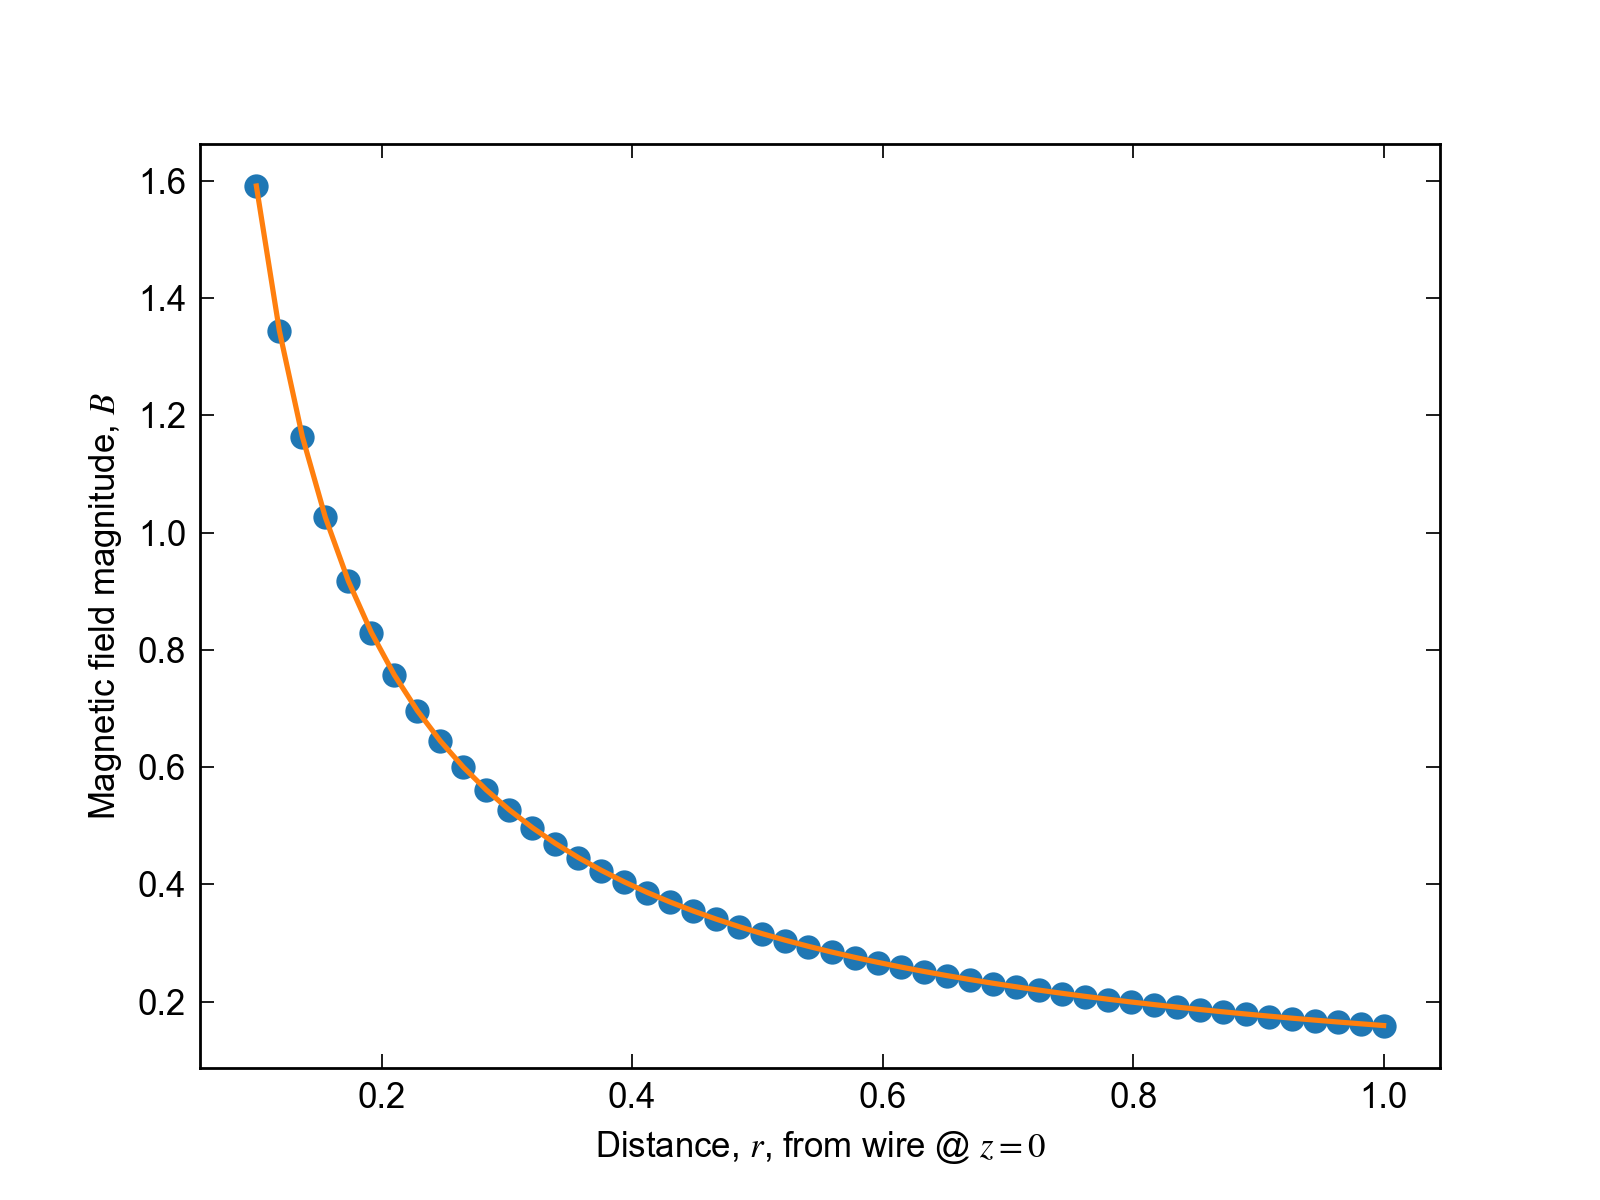

In [4]:
Bx = []
By = []
rlist = np.linspace(0.1, 1, 50)
for r in rlist:
    r = np.array([r,0,0])
    lz, dB = dBwire(r, 10, 1000)
    Bx.append(mytrapz(dB[:,0], lz))
    By.append(mytrapz(dB[:,1], lz))

Bx = np.array(Bx)
By = np.array(By)
B = np.sqrt(Bx**2 + By**2)
plt.figure()
plt.plot(rlist, B,'o')
plt.plot(rlist, 1/(2*np.pi*rlist))
plt.xlabel(r'Distance, $r$, from wire @ $z=0$')
plt.ylabel(r'Magnetic field magnitude, $B$')

<IPython.core.display.Javascript object>


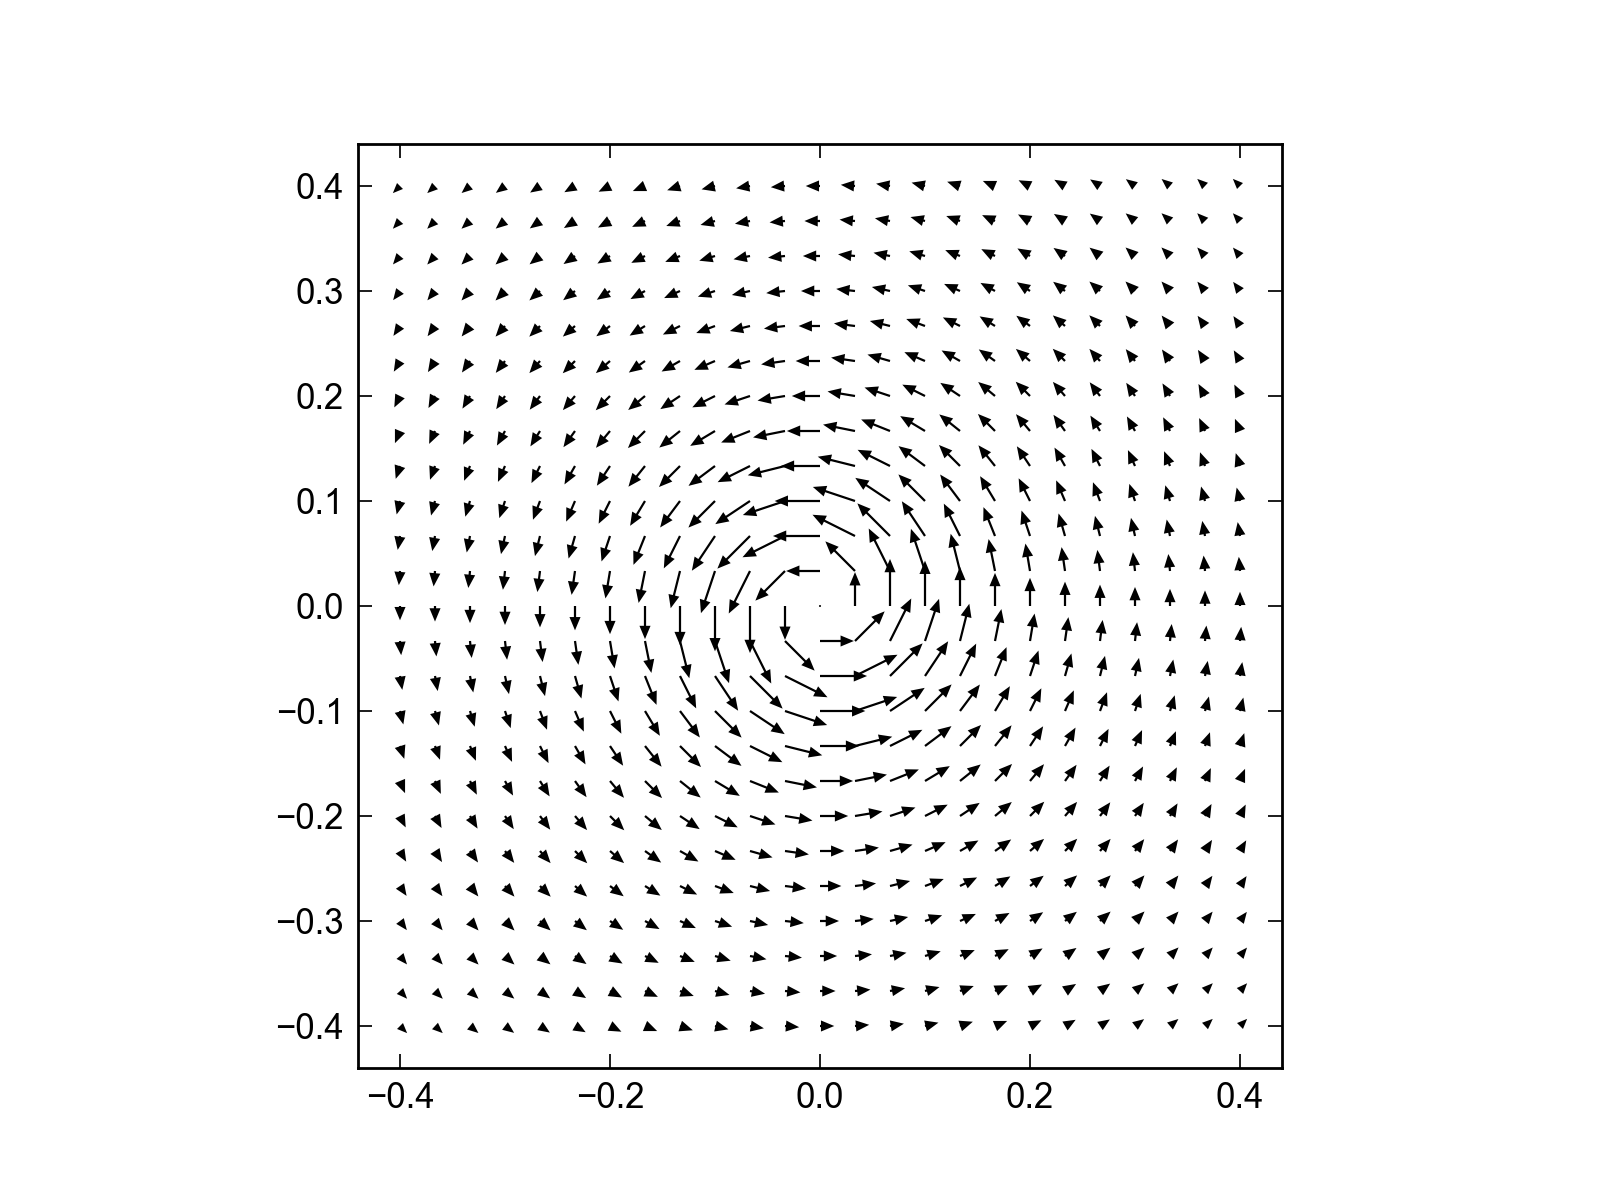

In [5]:
Cx = 25
Cy = 25
Bx = np.zeros((Cx,Cy))
By = np.zeros((Cx,Cy))
rx = np.linspace(-0.4, 0.4, Cx)
ry = np.linspace(-0.4, 0.4, Cy)
for i in range(Cx):
    for j in range(Cy):
        r = np.array((rx[i], ry[j], 0.0))
        lz, dB = dBwire(r, 10, 100)
        Bx[i,j] = mytrapz(dB[:,0], lz)
        By[i,j] = mytrapz(dB[:,1], lz)

plt.figure()
ax = plt.axes(aspect='equal')
ax.quiver(rx,ry,Bx.T, By.T, headwidth=5, headlength=6, headaxislength=6)

What happens to the the numerical solution as we get closer to the wire due to the finite discretization of the integral?

## Example: Magnetic field of a solenoid

<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/magnetic/imgmag/sol3.gif" width=500px>



We can describe a solenoid as a helical wire that wraps around the $y$-axis parameterized by the curve $\vec{\ell(t)} = \left\{\cos(\omega t), t, \sin(\omega t)\right\}$ that describes a helix that grows along the y axis. The "frequency", $\omega$, determines how tightly wound is the coil.

<IPython.core.display.Javascript object>


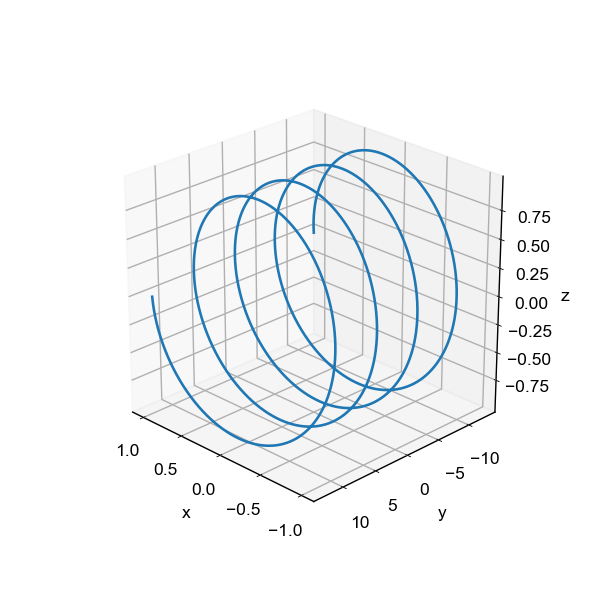

In [18]:
from mpl_toolkits.mplot3d import Axes3D

w = 1

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

t = np.linspace(-4*np.pi, 4*np.pi, 10000)
x = np.cos(w*t)
y = t
z = np.sin(w*t)

ax.plot(x, y, z)
ax.view_init(25, 135)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

The infinitesimal current loop in this case becomes 

$$\vec{d\ell(t)} = \frac{\vec{d\ell(t)}}{dt}dt = \{-\omega \sin(\omega t), 1 , \omega \cos(\omega t)\}dt$$

and the distance vector from our position of interest to the curve is

$$ \vec{r'(t)} = \vec{r} - \vec{\ell(t)} = \{r_x - \cos(\omega t), r_y - t , r_z - \sin(\omega t)\}.$$

The vector product in the integrand of the Biot-Savart law becomes

\begin{align}
\frac{\vec{\ell(t)}}{dt} \times \vec{r'(t)} &= [r_z - \sin(\omega t) - (r_y - t)\omega \cos(\omega t)]\hat{i}\\
                                            &+ [\omega\sin(\omega t)(r_z - \sin(\omega t)) + (r_x - \cos(\omega t))\omega \cos(\omega t)]\hat{j}\\
                                            &+ [-(r_y - t)\omega \sin(\omega t) - r_x + \cos(\omega t)]\hat{k}.
\end{align}

We can put all of this together to calculate three 1D integrals for each component of the magnetic field:

\begin{align}
B_x(\vec{r}) &= \frac{\mu_0 I}{4\pi} \int_{t_0}^{t_1} dt \frac{r_z - \sin(\omega t) - (r_y - t)\omega \cos(\omega t)}{r'(t)^3} = \int dB_x \\
B_y(\vec{r}) &= \frac{\mu_0 I}{4\pi} \int_{t_0}^{t_1} dt \frac{\omega\sin(\omega t)(r_z - \sin(\omega t)) + (r_x - \cos(\omega t))\omega \cos(\omega t)}{r'(t)^3} = \int dB_y \\
B_z(\vec{r}) &= \frac{\mu_0 I}{4\pi} \int_{t_0}^{t_1} dt \frac{-(r_y - t)\omega \sin(\omega t) - r_x + \cos(\omega t)}{r'(t)^3} = \int dB_z \\
\end{align}

<div class="span alert alert-success">
<h2>  Programming challenge(s) </h2>
<br><br>
1) Use the function `dBhelix(r, w, t_0, t_1, Nz)` that takes as input a position vector $\vec{r}$ in 3-dimensions, $\omega$, the limits of integration $t_0$ and $t_1$, and the number of points to be used in the numerical quadrature $N_t$, to calculate the magnetic field in 3-dimensions. Start with values of $\omega = 1$, $t_0 = -4\pi$, $t_1 = 4\pi$, and $N_t = 500$ as inputs for `dBhelix`. Scan a region of space for $\vec{r}$ spanned by `rx = np.linspace(-6, 6, Cx)`, `ry = np.linspace(-20, 20, Cy)`, and `rz = np.linspace(-6, 6, Cz)`, where `Cx = 3`, `Cy = 200`, and `Cz = 21`.
<br><br>
2) Create a 1-dimensional plot of each of the three components of the magnetic field along the center of the solenoid ($x=0$ and $z=0$).
<br><br>
3) Create two `plt.quiver` plots of the magnetic field projection in the $yz$ plane ($x=0$). In the second plot show the $y$ and $z$ components of the magnetic field normalized by the magnitude of the field in order to better see the direction of the field.
<br><br>
4) Increase the value of $\omega$ and observe how the magnetic field inside the solenoid becomes more uniform and the field outside becomes weak and divergent.
</div>

In [19]:
def dBhelix(r, w, t0, t1, Nt):
    dB = np.zeros((Nt,3))
    t = np.linspace(t0, t1, Nt)
    rp = (r[0]-np.cos(w*t))**2 + (r[1]-t)**2 + (r[2]-np.sin(w*t))**2
    rp3 = rp**(3/2)
    dB[:,0] = (1/(4.0*np.pi))*(r[2] - np.sin(w*t) - w*np.cos(w*t)*(r[1]-t))/rp3
    dB[:,1] = (1/(4.0*np.pi))*(w*np.sin(w*t)*(r[2] - np.sin(w*t)) + w*np.cos(w*t)*(r[0] - np.cos(w*t)))/rp3
    dB[:,2] = (1/(4.0*np.pi))*(-w*np.sin(w*t)*(r[1] - t) - r[0] + np.cos(w*t))/rp3
    return t, dB

In [23]:
Cx = 3
Cy = 200
Cz = 21
Bx = np.zeros((Cx,Cy,Cz))
By = np.zeros((Cx,Cy,Cz))
Bz = np.zeros((Cx,Cy,Cz))
rx = np.linspace(-6, 6, Cx)
ry = np.linspace(-20, 20, Cy)
rz = np.linspace(-6, 6, Cz)
for i in range(Cx):
    for j in range(Cy):
        for k in range(Cz):
            r = np.array((rx[i], ry[j], rz[k]))
            t, dB = dBhelix(r, w=10, t0=-4*np.pi, t1=4*np.pi, Nt=500)
            Bx[i,j,k] = mytrapz(dB[:,0], t)
            By[i,j,k] = mytrapz(dB[:,1], t)
            Bz[i,j,k] = mytrapz(dB[:,2], t)


<IPython.core.display.Javascript object>


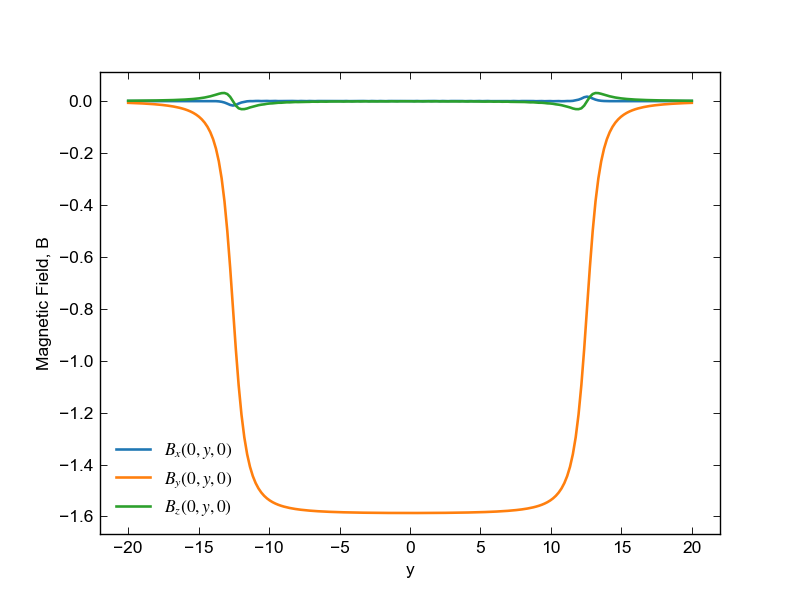

In [24]:
plt.figure()
plt.plot(ry,Bx[Cx//2,:,Cz//2],label=r'$B_x(0,y,0)$')
plt.plot(ry,By[Cx//2,:,Cz//2],label=r'$B_y(0,y,0)$')
plt.plot(ry,Bz[Cx//2,:,Cz//2],label=r'$B_z(0,y,0)$')
plt.xlabel('y')
plt.ylabel('Magnetic Field, B')
plt.legend()

<IPython.core.display.Javascript object>


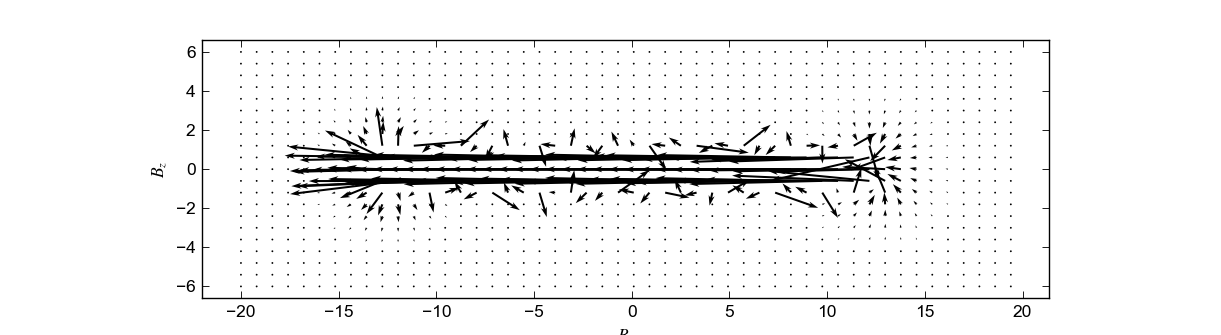

<IPython.core.display.Javascript object>


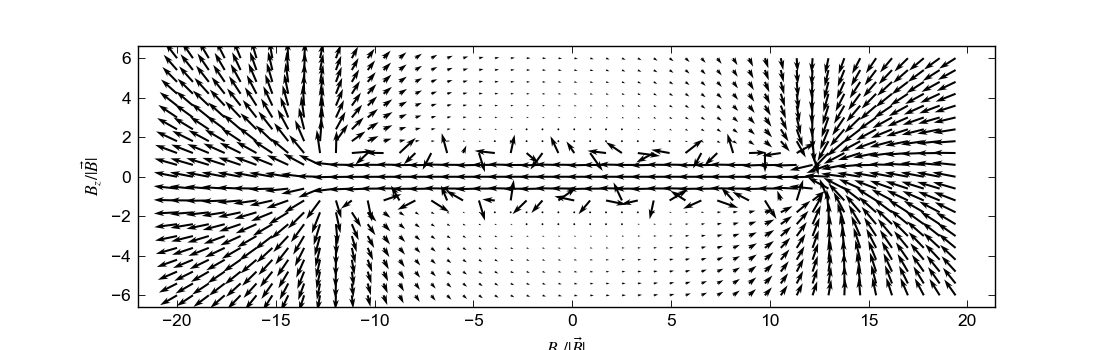

In [25]:
Bmag = np.sqrt(Bx*Bx + By*By + Bz*Bz)
Bxm = Bx/Bmag
Bym = By/Bmag
Bzm = Bz/Bmag
plt.figure()
ax = plt.axes(aspect='equal')
ax.quiver(ry[::4],rz,By[Cx//2,::4,:].T, Bz[Cx//2,::4,:].T, headwidth=3, headlength=5, headaxislength=4)
ax.set_xlabel(r'$B_y$')
ax.set_ylabel(r'$B_z$')
plt.figure()
ax = plt.axes(aspect='equal')
ax.quiver(ry[::4],rz,Bym[Cx//2,::4,:].T, Bzm[Cx//2,::4,:].T, headwidth=3, headlength=5, headaxislength=4)
ax.set_xlabel(r'$B_y/|\vec{B}|$')
ax.set_ylabel(r'$B_z/|\vec{B}|$')

In [16]:
from scipy.io import netcdf 

fp = netcdf.NetCDFFile('Bfieldhelix_w50.nc','w') # create and open a new NetCDF file

# Define the dimensions and set the units
fp.createDimension('x', Cx) # 'x' is the dimension name and Nx is the number of items along that dimension
x = fp.createVariable('x', 'd', ('x',)) # 'd' indicates data of type double
x[:] = rx # could also be just x[:] = np.arange(0, Nx)
x.units = 'm'                               # x is not a simple numpy array so doing x = np.arange(0, Nx) won't work

fp.createDimension('y', Cy)
y = fp.createVariable('y', 'd', ('y',))
y[:] = ry
y.units = 'm'

fp.createDimension('z', Cz)
z = fp.createVariable('z', 'd', ('z',))
z[:] = rz
z.units = 'm'

# Store the data array
Bx_data       = fp.createVariable('Bx', 'd', ('z','y','x'))
Bx_data.units = 'T'
Bx_data[:]    = Bx.T

By_data       = fp.createVariable('By', 'd', ('z','y','x'))
By_data.units = 'T'
By_data[:]    = By.T

Bz_data       = fp.createVariable('Bz', 'd', ('z','y','x'))
Bz_data.units = 'T'
Bz_data[:]    = Bz.T

fp.close()

### Homework problem - A toroidal solenoid

<IPython.core.display.Javascript object>


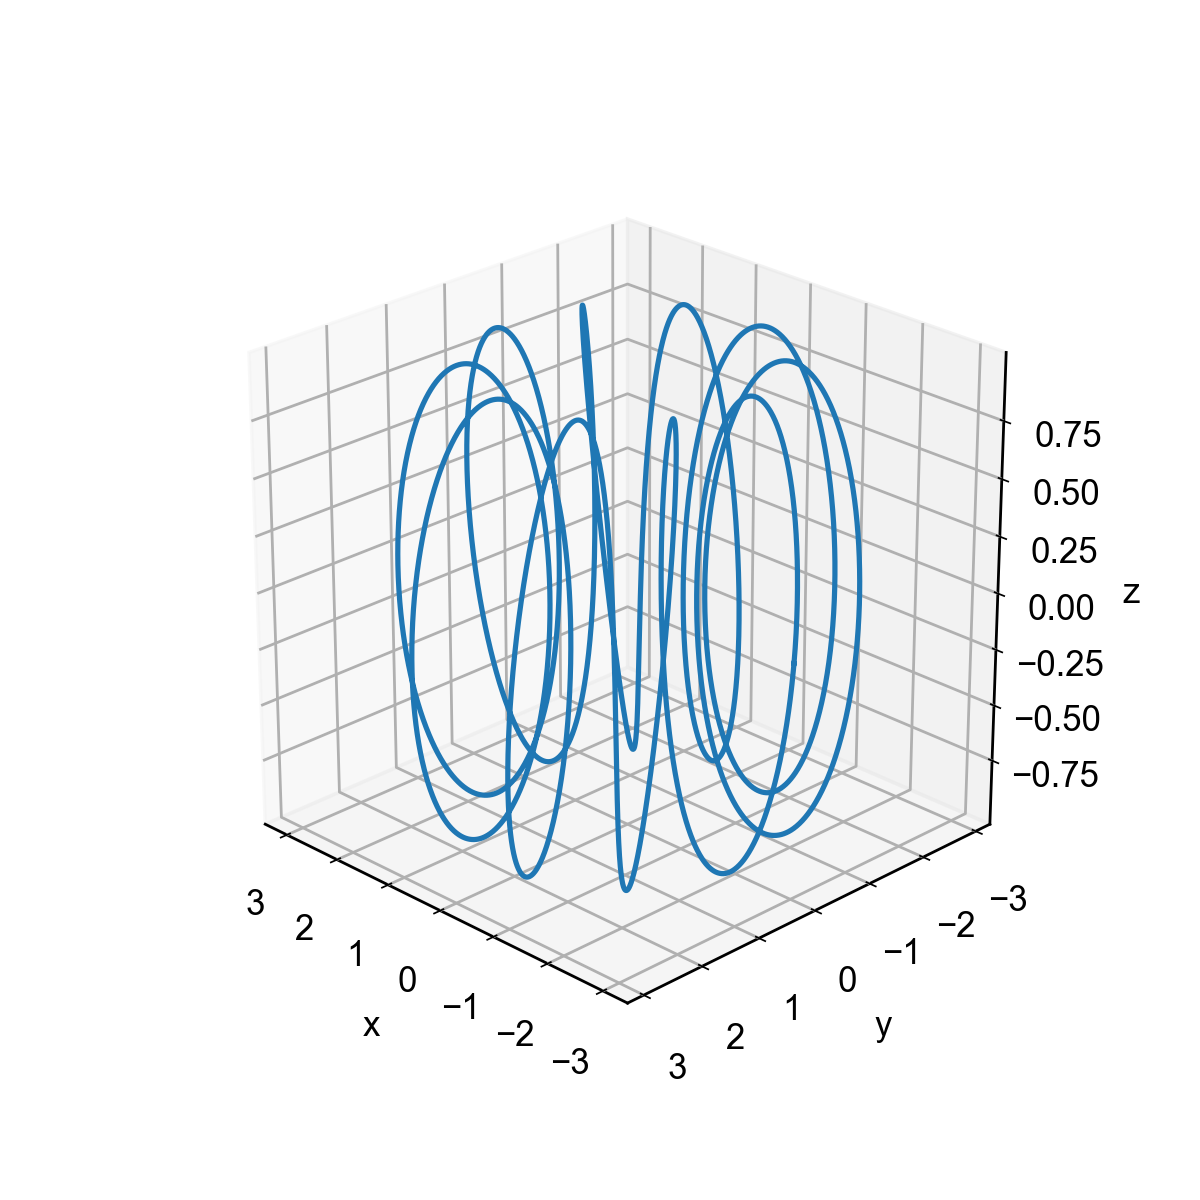

In [3]:
from mpl_toolkits.mplot3d import Axes3D

w = 10

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

t = np.linspace(-np.pi, np.pi, 10000)
x = 2*np.cos(t) + np.cos(w*t)*np.cos(t)
y = 2*np.sin(t) + np.cos(w*t)*np.sin(t)
z = np.sin(w*t)

ax.plot(x, y, z)
ax.view_init(25, 135)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')